Tamanho dos dados de treinamento: (878049, 9)
Tamanho dos dados de teste: (884262, 7)
Uso de memória: 326.83984375 MB
Valores ausentes nos dados de treinamento:
 Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
Valores ausentes nos dados de teste:
 Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64
Uso de memória: 327.59375 MB
Tamanho dos dados de treinamento (amostra): (87805, 9)
Tamanho dos dados de teste (amostra): (88426, 7)
Uso de memória: 234.40234375 MB
Clusters adicionados aos dados. Tempo: 0.25156331062316895 segundos
Uso de memória: 245.4375 MB


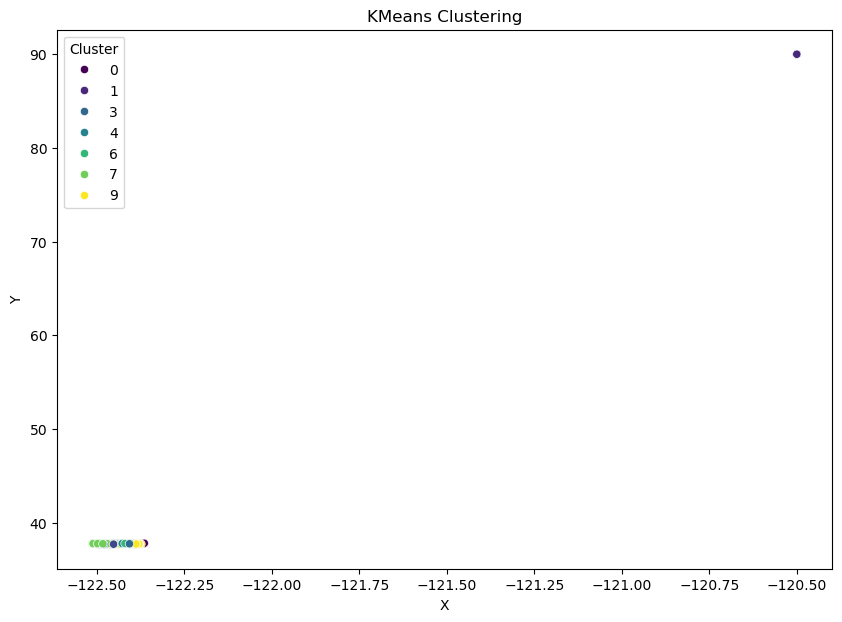

Category codificado.
Uso de memória: 272.2890625 MB
Variáveis categóricas codificadas. Tempo: 0.13319039344787598 segundos
Uso de memória: 248.58203125 MB
Consistência das colunas garantida.
Uso de memória: 249.9296875 MB
Features e alvo separados.
Uso de memória: 255.61328125 MB
Dados divididos em treino e validação.
Uso de memória: 264.015625 MB
Tamanho do conjunto de treino: (70244, 34)
Tamanho do conjunto de validação: (17561, 34)


C:\Users\isabe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo treinado. Tempo: 20.293663263320923 segundos
Uso de memória: 254.12109375 MB
Classes em y_true: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37}
Classes em y_pred: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37}
Log Loss: 2.6831207034604323
Avaliação do modelo concluída. Tempo: 0.05600547790527344 segundos
Uso de memória: 260.8046875 MB
Previsões feitas. Tempo: 0.13803339004516602 segundos
Uso de memória: 291.9296875 MB
Arquivo de submissão preparado.
Primeiras linhas do arquivo de submissão:
    Id         0         1         2         3         4         5         6  \
0  0.0  0.001839  0.091457  0.000559  0.000299  0.043593  0.004511  0.002441   
1  NaN  0.001840  0.087774  0.000563  0.000302  0.042713  0.004494  0.002439   
2  NaN  0.001832  0.086477  0.000559  0.000301  0.043087  0.004537  0.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil

# Função para monitorar o uso de memória
def print_memory_usage():
    process = psutil.Process()
    mem_info = process.memory_info()
    print(f"Uso de memória: {mem_info.rss / (1024 ** 2)} MB")

# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Verificar tamanho dos dados
print("Tamanho dos dados de treinamento:", train_data.shape)
print("Tamanho dos dados de teste:", test_data.shape)
print_memory_usage()

# Verificar valores ausentes
print("Valores ausentes nos dados de treinamento:\n", train_data.isnull().sum())
print("Valores ausentes nos dados de teste:\n", test_data.isnull().sum())
print_memory_usage()

# Usar uma amostra dos dados para testes
train_data = train_data.sample(frac=0.1, random_state=42)
test_data = test_data.sample(frac=0.1, random_state=42)
print("Tamanho dos dados de treinamento (amostra):", train_data.shape)
print("Tamanho dos dados de teste (amostra):", test_data.shape)
print_memory_usage()

# Converter a coluna de datas para datetime
train_data['Dates'] = pd.to_datetime(train_data['Dates'])
test_data['Dates'] = pd.to_datetime(test_data['Dates'])

# Extrair componentes da data
train_data['Year'] = train_data['Dates'].dt.year
train_data['Month'] = train_data['Dates'].dt.month
train_data['Day'] = train_data['Dates'].dt.day
train_data['Hour'] = train_data['Dates'].dt.hour
train_data['DayOfWeek'] = train_data['Dates'].dt.dayofweek

test_data['Year'] = test_data['Dates'].dt.year
test_data['Month'] = test_data['Dates'].dt.month
test_data['Day'] = test_data['Dates'].dt.day
test_data['Hour'] = test_data['Dates'].dt.hour
test_data['DayOfWeek'] = test_data['Dates'].dt.dayofweek

# Aplicar KMeans para criar clusters baseados em localização
start_time = time.time()
kmeans = KMeans(n_clusters=10, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(train_data[['X', 'Y']])
test_data['Cluster'] = kmeans.predict(test_data[['X', 'Y']])
print("Clusters adicionados aos dados. Tempo: %s segundos" % (time.time() - start_time))
print_memory_usage()

# Visualização dos clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=test_data['X'], y=test_data['Y'], hue=test_data['Cluster'], palette='viridis')
plt.title('KMeans Clustering')
plt.show()

# Codificar a coluna 'Category'
label_encoder = LabelEncoder()
train_data['Category'] = label_encoder.fit_transform(train_data['Category'])
print("Category codificado.")
print_memory_usage()

# Codificar outras variáveis categóricas
start_time = time.time()
train_data = pd.get_dummies(train_data, columns=['PdDistrict', 'DayOfWeek', 'Cluster'])
test_data = pd.get_dummies(test_data, columns=['PdDistrict', 'DayOfWeek', 'Cluster'])
print("Variáveis categóricas codificadas. Tempo: %s segundos" % (time.time() - start_time))
print_memory_usage()

# Garantir que as colunas de treino e teste são as mesmas
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)
for col in train_columns - test_columns:
    test_data[col] = 0
for col in test_columns - train_columns:
    train_data[col] = 0
print("Consistência das colunas garantida.")
print_memory_usage()

# Separar as features e o alvo
X = train_data.drop(['Category', 'Descript', 'Resolution', 'Address', 'Dates'], axis=1)
y = train_data['Category']
print("Features e alvo separados.")
print_memory_usage()

# Dividir os dados em conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dados divididos em treino e validação.")
print_memory_usage()

# Verificar tamanho dos dados de treino e validação
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de validação:", X_val.shape)

# Treinar o modelo com uma versão simplificada
start_time = time.time()
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
print("Modelo treinado. Tempo: %s segundos" % (time.time() - start_time))
print_memory_usage()

# Avaliar o modelo
start_time = time.time()
y_pred_proba = model.predict_proba(X_val)

# Verificar classes presentes em y_true e y_pred
print("Classes em y_true:", set(y_val))
print("Classes em y_pred:", set(model.classes_))

# Calcular log_loss garantindo que todas as classes estão presentes
log_loss_value = log_loss(y_val, y_pred_proba, labels=model.classes_)
print('Log Loss:', log_loss_value)
print("Avaliação do modelo concluída. Tempo: %s segundos" % (time.time() - start_time))
print_memory_usage()

# Preparar os dados de teste
X_test = test_data[X.columns]

# Fazer previsões
start_time = time.time()
test_pred_proba = model.predict_proba(X_test)
print("Previsões feitas. Tempo: %s segundos" % (time.time() - start_time))
print_memory_usage()

# Preparar o arquivo de submissão
submission = pd.DataFrame(test_pred_proba, columns=model.classes_)

# Adicionar colunas de classes ausentes como zeros
for col in label_encoder.classes_:
    if col not in submission.columns:
        submission[col] = 0

# Preencher valores NaN com zero
submission.fillna(0, inplace=True)

submission.insert(0, 'Id', test_data['Id'])
submission.to_csv('submission.csv', index=False)
print("Arquivo de submissão preparado.")
print("Primeiras linhas do arquivo de submissão:")
print(submission.head())
